<a href="https://colab.research.google.com/github/alyahoang99/causal_inference_synthetic_data/blob/main/student_performance_analysisipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Observational data
Use observations to make conclusions. We will use the Student Performance data set from UC Irvine ML repository. We will investigate how willingness to take higher education affects the math class's final score. We will start with a trivial model and causal chart  


In [ ]:
import pandas as pd
import statsmodels.formula.api as smf

In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
student_performance = fetch_ucirepo(id=320)

# data (as pandas dataframes)
X = student_performance.data.features
y = student_performance.data.targets

# metadata
print(student_performance.metadata)

# variable information
print(student_performance.variables)


{'uci_id': 320, 'name': 'Student Performance', 'repository_url': 'https://archive.ics.uci.edu/dataset/320/student+performance', 'data_url': 'https://archive.ics.uci.edu/static/public/320/data.csv', 'abstract': 'Predict student performance in secondary education (high school). ', 'area': 'Social Science', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 649, 'num_features': 30, 'feature_types': ['Integer'], 'demographics': ['Sex', 'Age', 'Other', 'Education Level', 'Occupation'], 'target_col': ['G1', 'G2', 'G3'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2008, 'last_updated': 'Fri Jan 05 2024', 'dataset_doi': '10.24432/C5TG7T', 'creators': ['Paulo Cortez'], 'intro_paper': {'title': 'Using data mining to predict secondary school student performance', 'authors': 'P. Cortez, A. M. G. Silva', 'published_in': 'Proceedings of 5th Annual Future Business Technology Conference', 'year'

In [ ]:
df = pd.read_csv('https://archive.ics.uci.edu/static/public/320/data.csv')
df.head().T

,0,1,2,3,4
school,GP,GP,GP,GP,GP
sex,F,F,F,F,F
age,18,17,15,15,16
address,U,U,U,U,U
famsize,GT3,GT3,LE3,GT3,GT3
Pstatus,A,T,T,T,T
Medu,4,1,1,4,3
Fedu,4,1,1,2,3
Mjob,at_home,at_home,at_home,health,other
Fjob,teacher,other,other,services,other


<Axes: >

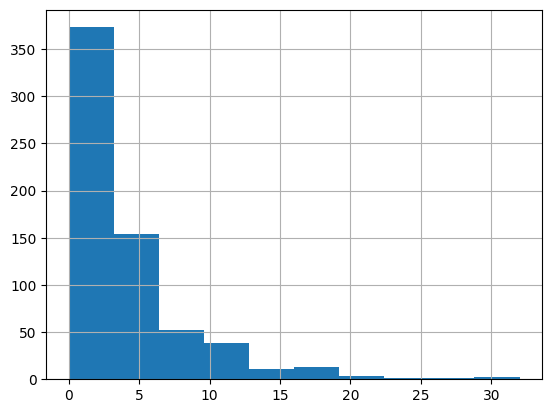

In [ ]:
df.absences.hist(bins = 10)

In [ ]:
df['Pedu'] = (df.Medu + df.Fedu)/2

In [ ]:
model = smf.ols('G3 ~ higher', data=df).fit()
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,8.7971,0.367,23.962,0.000,8.076,9.518
higher[T.yes],3.4788,0.388,8.958,0.000,2.716,4.241


In [ ]:
model = smf.ols('G3 ~ higher + Medu + Fedu', data=df).fit()
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.7633,0.417,18.616,0.000,6.944,8.582
higher[T.yes],3.0407,0.392,7.762,0.000,2.271,3.810
Medu,0.3773,0.137,2.751,0.006,0.108,0.647
Fedu,0.2066,0.141,1.467,0.143,-0.070,0.483


# Conclusion
- The intercept and the coefficients for "higher" and "Medu" are statistically significant and positively associated with the dependent variable.
- The coefficient for "Fedu" is not statistically significant, indicating that father's education does not have a statistically significant impact on the dependent variable in this model.